In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('datasets/insurance.csv')

# Análisis exploratorio

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [14]:
print('El dataset tiene {} columnas y {} filas'.format(df .shape[1], df.shape[0]))

El dataset tiene 7 columnas y 1338 filas


¿Cuál es la naturaleza de los datos?

In [15]:
print('Información del dataframe:\n')
df.info()

Información del dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No tenemor valores nulos.

Tipo de los datos:
* **int64**: age, children.
* **float64**: bmi, expenses.
* **object**: sex, smoker, region 

# Análisis de datos

Analizaremos los efectos que tienen los atributos sobre la variable objetivo `expenses`

In [16]:
def atributos_vs_objetivo(atributo, objetivo, dataframe):
    """Crea una tabla resumen del promedio del atributo en contra del objetivo y devuelve un dataframe.

    Args:
        atributo ([List]): [Atributo a analizar]
        objetivo ([List]): [Variable objetivo]
        dataframe ([DataFrame]): [Dataframe a analizar]

    Returns:
        tabla ([DataFrame]): [Tabla con el promedio de cada atributo en contra del objetivo]
    """
    tabla = dataframe[[atributo, objetivo]].groupby(atributo, as_index=False).mean().sort_values(by=objetivo, ascending=False).style.background_gradient(cmap='Blues')
    return tabla  

In [17]:
sex_expenses = atributos_vs_objetivo('sex', 'expenses', df)
sex_expenses

,sex,expenses
1,male,13956.751420
0,female,12569.578897


En promedio los hombres deben desembolsar más dinero a la hora de contratar un seguro de salud.

In [18]:
children_expenses = atributos_vs_objetivo('children', 'expenses', df)
children_expenses

,children,expenses
3,3,15355.318535
2,2,15073.564000
4,4,13850.656800
1,1,12731.171821
0,0,12365.975767
5,5,8786.035556


En promedio, las familiar deben pagar más dinero al tener entre 2 y 4 hijos.

In [19]:
smoker_expenses = atributos_vs_objetivo('smoker', 'expenses', df)
smoker_expenses

,smoker,expenses
1,yes,32050.231971
0,no,8434.268449


Las personas fumadoras pagan en promedio casi 4 veces lo que paga una persona no fumadora, lo cual puede tener mucha influencia a la hora de modelarlo.

In [20]:
region_expenses = atributos_vs_objetivo('region', 'expenses', df)
region_expenses

,region,expenses
2,southeast,14735.411538
0,northeast,13406.384691
1,northwest,12417.575169
3,southwest,12346.937908


La región más cara es 'southeast' y por el contrario la más barata es 'southwest' 

In [21]:
df[['region', 'sex', 'bmi', 'expenses']].groupby(['region'], as_index=False).mean().sort_values(by=['expenses'], ascending=False).style.background_gradient(cmap='Blues')

,region,bmi,expenses
2,southeast,33.359341,14735.411538
0,northeast,29.176235,13406.384691
1,northwest,29.201846,12417.575169
3,southwest,30.596615,12346.937908


In [22]:
# Anlisis bmi ranges
bmi_ranges = np.where(df['bmi'] < 18.5, 'bajo peso', 
             np.where(df['bmi'] < 25, 'peso normal', 
             np.where(df['bmi'] < 30, 'sobrepeso', 
             'obesidad')))

Rangos de bmi, según [NHS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/)

In [23]:
df['bmi_range'] = bmi_ranges

In [24]:
bmi_range_table = atributos_vs_objetivo('bmi_range', 'expenses', df)
bmi_range_table

,bmi_range,expenses
1,obesidad,15552.335728
3,sobrepeso,11000.079306
2,peso normal,10379.499775
0,bajo peso,8852.201500


Los costos de los seguros de salud son más caros, mientras mayor índice de masa corporal tenga la persona.

In [190]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'bmi_range'],
      dtype='object')

# Visualización de los datos

Visualizaremos las variables del dataset y sacaremos información de:
* Sex
* Age
* Children
* Smoker
* Region
* Expenses

## Sex

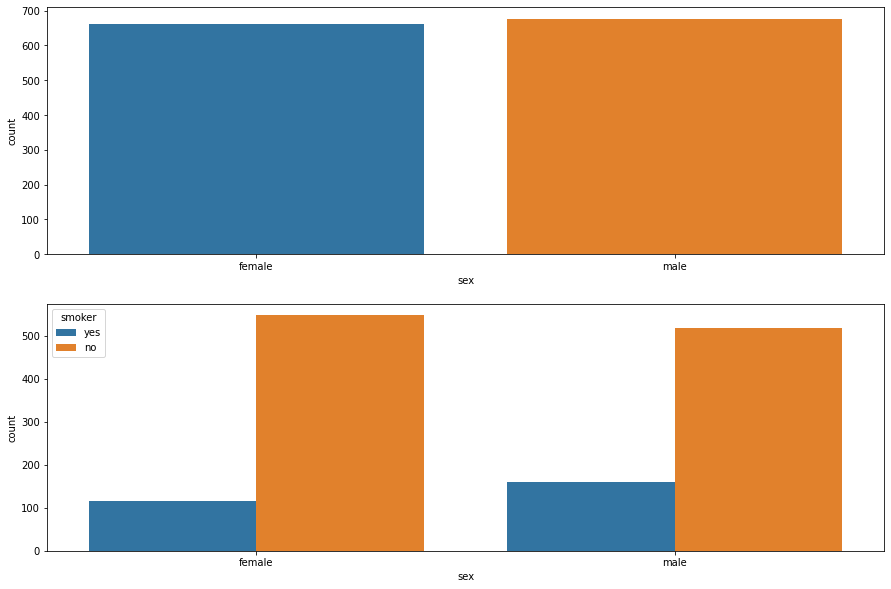

In [27]:
fig, ax = plt.subplots(2, figsize=(15,10))

sns.countplot(ax=ax[0] , x='sex', data=df)
sns.countplot(ax=ax[1] , x='sex', data =df, hue='smoker');

* Hay una cantidad muy similas de hombres y mujeres en el dataset.
* La proporción de fumadores es similas en ambos sexos, sin embargo los hombres tienen un mayor porcentaje de fumadores que las mujeres.

## Age

In [72]:
avg_age_region = df[['region', 'age']].groupby('region', as_index=False).mean()
avg_age_sex = df[['sex', 'age']].groupby('sex', as_index=False).mean()
avg_age_children = df[['children', 'age']].groupby('children', as_index=False).mean()

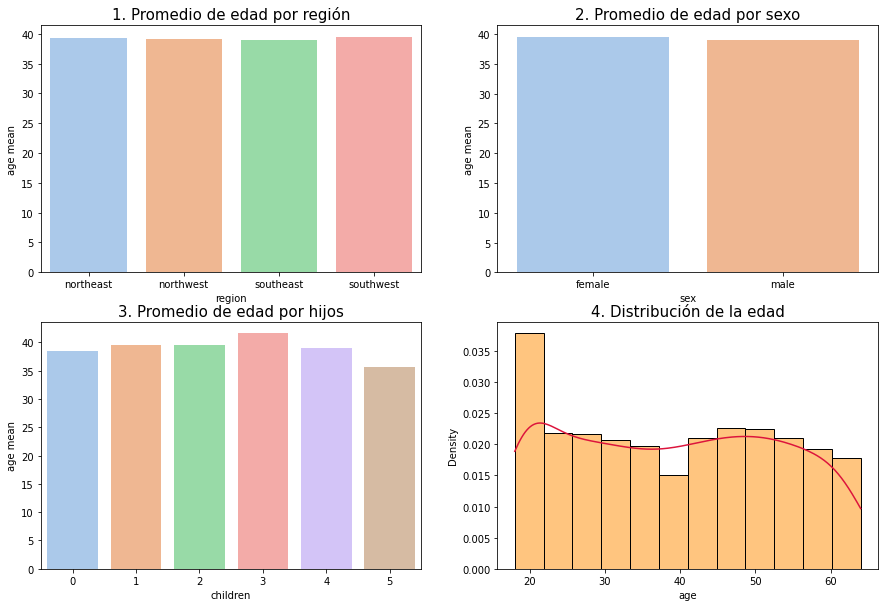

In [207]:
fig, ax = plt.subplots(2,2, figsize =(15,10))

sns.barplot(ax=ax[0,0], x='region', y='age', data=avg_age_region, palette='pastel')
ax[0,0].set_title('1. Promedio de edad por región', fontdict={'fontsize': '15'})
ax[0,0].set_ylabel('age mean')	

sns.barplot(ax=ax[0,1], x='sex', y='age', data=avg_age_sex, palette='pastel')
ax[0,1].set_title('2. Promedio de edad por sexo', fontdict={'fontsize': '15'})
ax[0,1].set_ylabel('age mean')

sns.barplot(ax=ax[1,0], x='children', y='age', data=avg_age_children, palette='pastel')
ax[1,0].set_title('3. Promedio de edad por hijos', fontdict={'fontsize': '15'})	
ax[1,0].set_ylabel('age mean')

sns.histplot(ax=ax[1,1] , x='age', data=df, stat='density', color='darkorange', kde=True)
ax[1,1].set_title('4. Distribución de la edad', fontdict={'fontsize': '15'})	
ax[1,1].lines[0].set_color('crimson')

plt.show()

1. La variación de edad de la gente entre regiones es muy poca.
2. El promedio de edad es casi el mismo en ambos géneros, siendo mayor en las mujeres.
3. El promedio de edad de las personas que tienen 3 hijos es el mayor, por otra parte las que tienen 5 hilos tienen la menor edad en promedio.
4. La edad de las personas no sigue una distribución normal, tiene el sesgo a la izquierda, puede ser corregida.

## Children

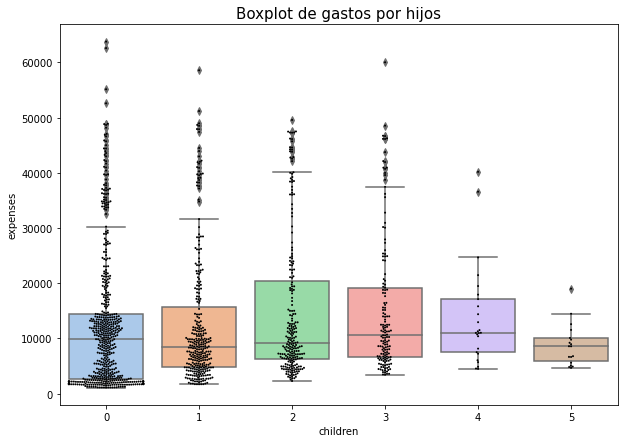

In [222]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='children', y='expenses', data=df, palette='pastel')
sns.swarmplot(x='children', y='expenses', data=df, color='black', size=2)
ax.set_title('Boxplot de gastos por hijos', fontdict={'fontsize': '15'});

* Las personas que tienen mayores costos son las que tienen 2 hijos, y las que menos las que tienen 5 hijos, sin embargo puede que esto no sea tan real, ya que las personas que tienen 4 o 5 hijos son muy pocas, entonces puede que no sea representativo.

## Smoker